## preprocessing dataset for the Face Shape problem

### Visualize Random samples from the dataset

In [1]:
import os
import cv2
import random
import matplotlib.pyplot as plt

def plot_random_images(folder_path, num_images_to_plot):
    # Get the list of files in the folder
    files = os.listdir(folder_path)

    # Filter only image files (you may want to add more image extensions)
    image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.JPG'))]

    # Ensure the folder path ends with a separator '/'
    folder_path = folder_path if folder_path.endswith('/') else folder_path + '/'

    # Print the total number of images in the folder
    total_images = len(image_files)
    print(f"Total number of images in {folder_path}: {total_images}")

    # If there are fewer images than specified, plot all images
    num_images_to_plot = min(num_images_to_plot, total_images)

    # Display the specified number of random images
    random_images = random.sample(image_files, num_images_to_plot)
    fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 3))

    for i, image_file in enumerate(random_images):
        img_path = folder_path + image_file
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Convert the image to float before displaying
        axes[i].imshow(img_rgb.astype(float) / 255)
        axes[i].axis('off')

    # Set the title of the entire plot to the total number of images
    fig.suptitle(f"Total number of images: {total_images}", fontsize=16)

    plt.show()

Total number of images in ./Dataset/oblong/: 100


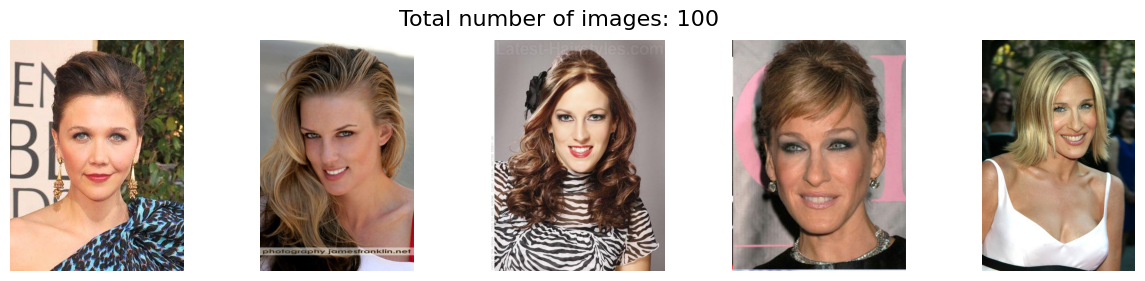

Total number of images in ./Dataset/heart/: 100


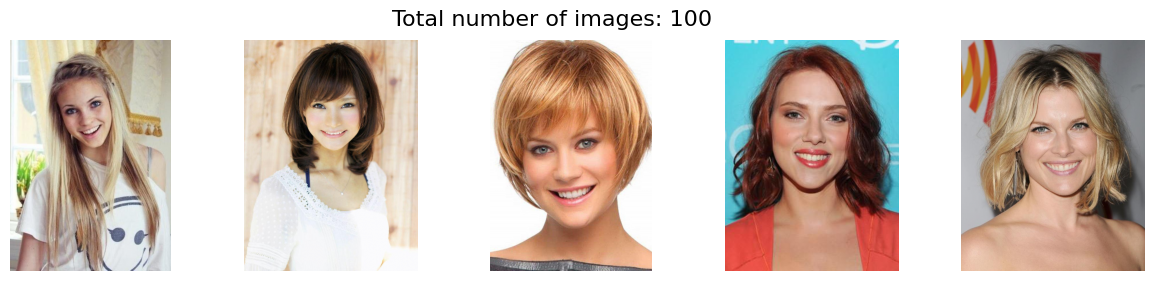

Total number of images in ./Dataset/square/: 100


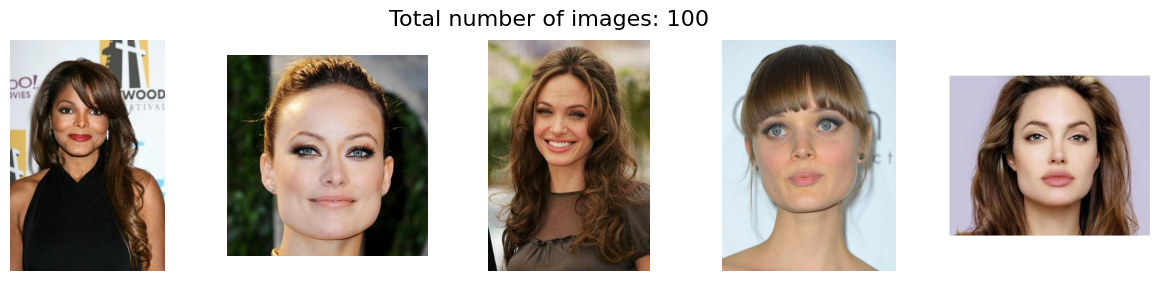

Total number of images in ./Dataset/oval/: 100


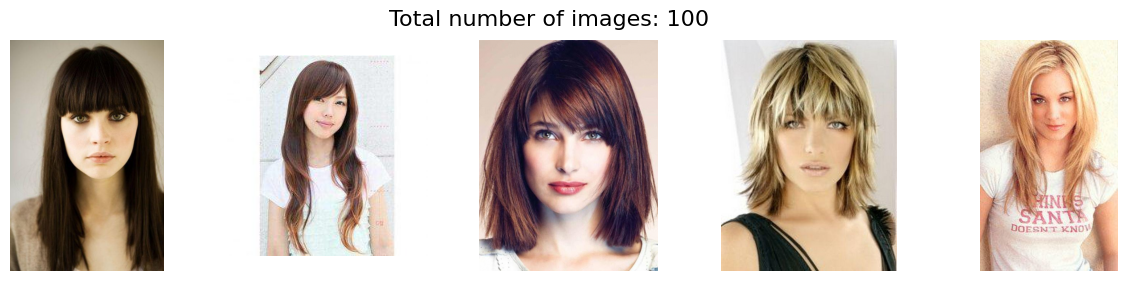

Total number of images in ./Dataset/round/: 100


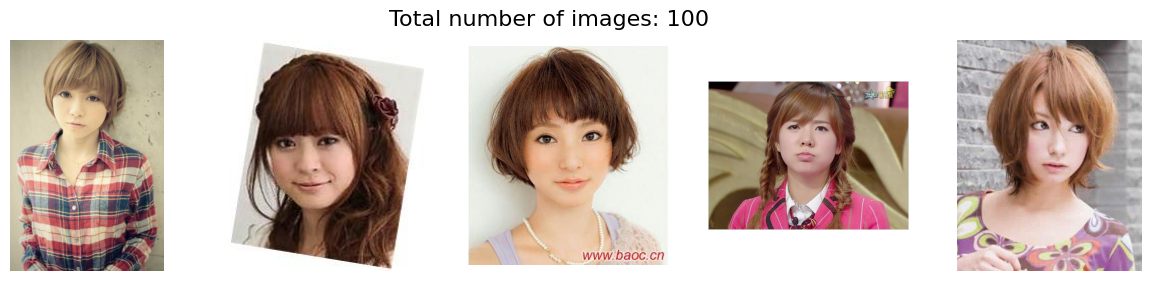

In [2]:
random_samples = 5 
oblong = "./Dataset/oblong/" 
heart ="./Dataset/heart/"
square = "./Dataset/square/"
oval = "./Dataset/oval/"
round="./Dataset/round/"
plot_random_images(oblong , random_samples)
plot_random_images(heart , random_samples)
plot_random_images(square , random_samples)
plot_random_images(oval , random_samples)
plot_random_images(round , random_samples)

### Face Detection

In [3]:
import dlib
import cv2
import os

def detect_and_save_faces(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Initialize the face detector and landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("./Utilities/shape_predictor_68_face_landmarks.dat")

    # Loop over the images in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.JPG')):
            image_path = os.path.join(input_folder, filename)

            # Read the image
            img = cv2.imread(image_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect faces in the image
            faces = detector(gray)

            # Loop over the faces and save the extracted faces
            for face in faces:
                landmarks = predictor(gray, face)
                
                # Draw a rectangle around the face
                cv2.rectangle(img, (face.left(), face.top()), (face.right(), face.bottom()), (0, 255, 0), 2)

                # Save the extracted face without landmarks
                extracted_face = img[face.top():face.bottom(), face.left():face.right()]
                cv2.imwrite(os.path.join(output_folder, f"{filename}_face.jpg"), extracted_face)

    # Count the number of extracted faces
    num_faces = len(os.listdir(output_folder))
    print(f"Total number of extracted faces: {num_faces}")

In [4]:
# heart 
input_folder = './Dataset/heart/'
output_folder = './Preprocessed/heart'
detect_and_save_faces(input_folder, output_folder)

Total number of extracted faces: 99


In [5]:
# oblong
input_folder = './Dataset/oblong/'
output_folder = './Preprocessed/oblong'
detect_and_save_faces(input_folder, output_folder)

Total number of extracted faces: 100


In [6]:
#square
input_folder = './Dataset/square/'
output_folder = './Preprocessed/square'
detect_and_save_faces(input_folder, output_folder)

Total number of extracted faces: 100


In [7]:
# round
input_folder = './Dataset/round/'
output_folder = './Preprocessed/round'
detect_and_save_faces(input_folder, output_folder)

Total number of extracted faces: 93


In [8]:
#oval
input_folder = './Dataset/oval/'
output_folder = './Preprocessed/oval'
detect_and_save_faces(input_folder, output_folder)

Total number of extracted faces: 95


### Resize the detected faces and Convert to Greyscale :)

In [9]:
import cv2
import os
import random
import matplotlib.pyplot as plt

def resize_and_rename_images(folder_path, target_size):
    # Get the list of files in the folder
    files = os.listdir(folder_path)

    # Filter only image files (you may want to add more image extensions)
    image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.JPG'))]

    # Ensure the folder path ends with a separator '/'
    folder_path = folder_path if folder_path.endswith('/') else folder_path + '/'

    # Loop through each image file
    for idx, image_file in enumerate(image_files, start=1):
        # Read the image
        img_path = folder_path + image_file
        img = cv2.imread(img_path)

        # Resize the image
        img_resized = cv2.resize(img, target_size)

        # Convert the image to grayscale
        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

        # Get the folder name as the prefix for renaming
        folder_name = os.path.basename(folder_path)
        new_name = f"{folder_name}{idx:02d}.jpg"  # Rename as FolderName01, FolderName02, ...

        # Save the resized and renamed image in grayscale
        cv2.imwrite(folder_path + new_name, img_gray)
        # Delete the original file
        os.remove(img_path)


In [10]:
heart = "./Preprocessed/heart/"
oblong = "./Preprocessed/oblong/"  
square = "./Preprocessed/square/"  
round = "./Preprocessed/round/"  
oval = "./Preprocessed/oval/"    
target_size = (128, 128)  
resize_and_rename_images(heart, target_size)
resize_and_rename_images(oblong, target_size)
resize_and_rename_images(square, target_size)
resize_and_rename_images(round, target_size)
resize_and_rename_images(oval, target_size)

Total number of images in ./Preprocessed/heart/: 99


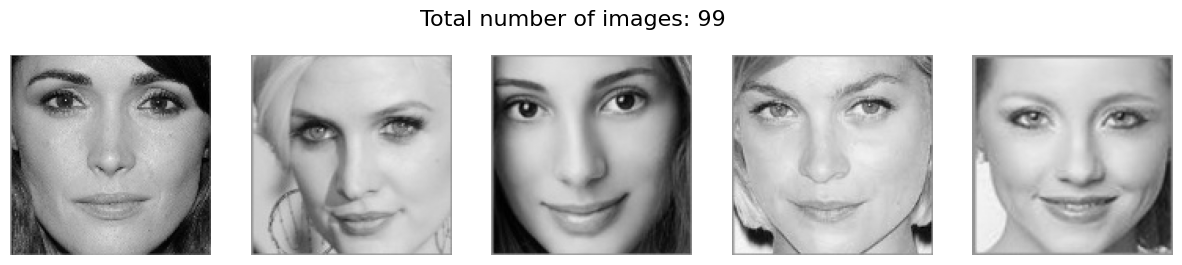

Total number of images in ./Preprocessed/oblong/: 100


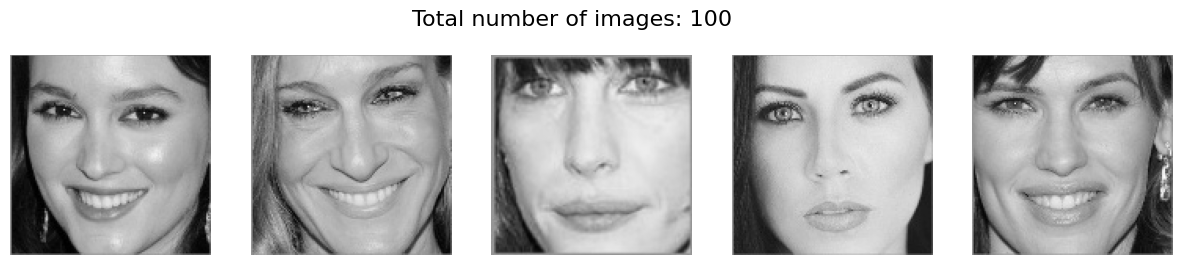

Total number of images in ./Preprocessed/square/: 100


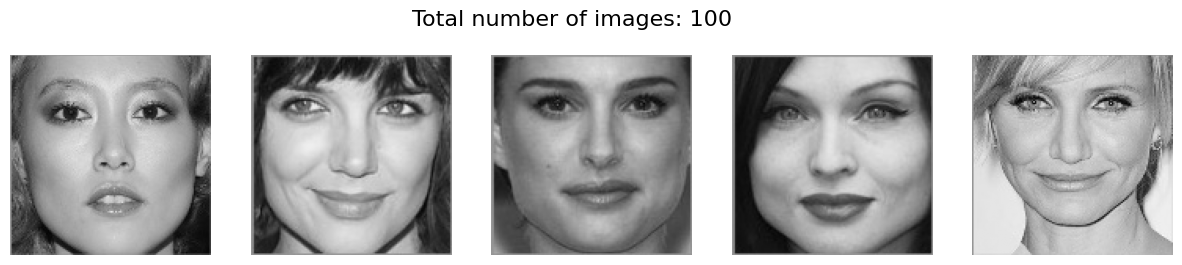

Total number of images in ./Preprocessed/round/: 93


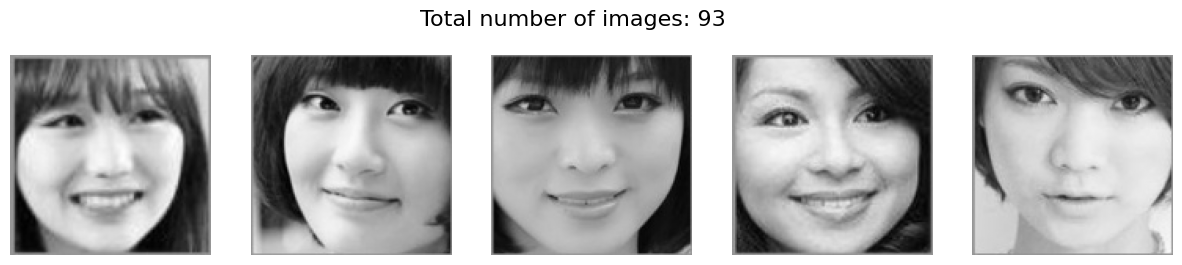

Total number of images in ./Preprocessed/oval/: 95


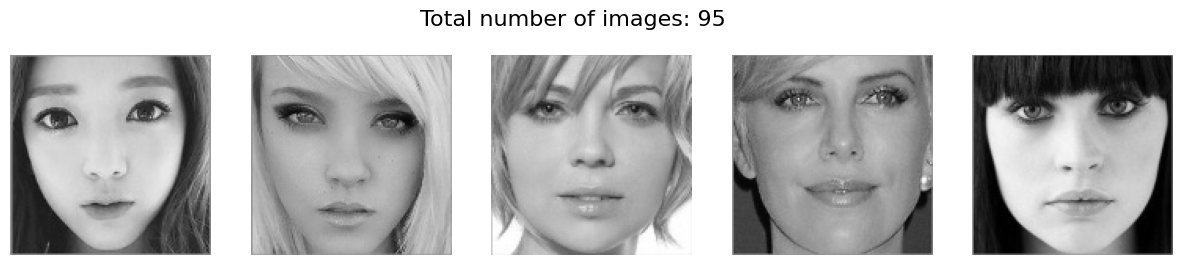

In [11]:
random_samples = 5 
heart = "./Preprocessed/heart/"
oblong = "./Preprocessed/oblong/"  
square = "./Preprocessed/square/"  
round = "./Preprocessed/round/"  
oval = "./Preprocessed/oval/"   
plot_random_images(heart , random_samples)
plot_random_images(oblong , random_samples)
plot_random_images(square , random_samples)
plot_random_images(round , random_samples)
plot_random_images(oval , random_samples)


### AUGMENTATION o_O

In [17]:
import os
import cv2

def augment_images(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # List all files in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]

    # Check if there are any images for augmentation
    if len(image_files) == 0:
        print("No images found in the input folder.")
        return

    # Print the number of images before augmentation
    num_images_before = len(image_files)
    print(f"Number of images before augmentation: {num_images_before}")

    # Augment each image in the folder
    for image_file in image_files:
        # Read the original image
        img = cv2.imread(os.path.join(input_folder, image_file))

        # Perform augmentations
        flipped_horizontally = cv2.flip(img, 1)
        flipped_hf = cv2.flip(flipped_horizontally, 1)
        # Rotate 5 degrees to the left
        rotation_matrix_left = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 5, 1)
        rotated_left_5 = cv2.warpAffine(img, rotation_matrix_left, (img.shape[1], img.shape[0]))

        # Rotate 5 degrees to the right
        rotation_matrix_right = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), -5, 1)
        rotated_right_5 = cv2.warpAffine(img, rotation_matrix_right, (img.shape[1], img.shape[0]))

        # Rotate 10 degrees to the left
        rotation_matrix_left_10 = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 10, 1)
        rotated_left_10 = cv2.warpAffine(img, rotation_matrix_left_10, (img.shape[1], img.shape[0]))

        # Rotate 10 degrees to the right
        rotation_matrix_right_10 = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), -10, 1)
        rotated_right_10 = cv2.warpAffine(img, rotation_matrix_right_10, (img.shape[1], img.shape[0]))

        # Save augmented images
        cv2.imwrite(os.path.join(output_folder, f"{image_file[:-4]}_flipped.jpg"), flipped_horizontally)
        cv2.imwrite(os.path.join(output_folder, f"{image_file[:-4]}_flipped_hf.jpg"), flipped_hf)
        cv2.imwrite(os.path.join(output_folder, f"{image_file[:-4]}_rotated_left_5.jpg"), rotated_left_5)
        cv2.imwrite(os.path.join(output_folder, f"{image_file[:-4]}_rotated_right_5.jpg"), rotated_right_5)
        cv2.imwrite(os.path.join(output_folder, f"{image_file[:-4]}_rotated_left_10.jpg"), rotated_left_10)
        cv2.imwrite(os.path.join(output_folder, f"{image_file[:-4]}_rotated_right_10.jpg"), rotated_right_10)

    # List all files in the output folder after augmentation
    augmented_files = [f for f in os.listdir(output_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]

    # Print the number of images after augmentation
    num_images_after = len(augmented_files)
    print(f"Number of images after augmentation: {num_images_after}")

    print(f"Augmentations applied and saved to {output_folder}")



In [18]:
# APPLY AUGMENTATION

heart = "./Preprocessed/heart/"
oblong = "./Preprocessed/oblong/"  
square = "./Preprocessed/square/"  
round = "./Preprocessed/round/"  
oval = "./Preprocessed/oval/"   

heart_augmented = "./Augmentation/heart"
oblong_augmented = "./Augmentation/oblong"
square_augmented = "./Augmentation/square"
round_augmented = "./Augmentation/round"
oval_augmented = "./Augmentation/oval"


augment_images(heart, heart_augmented)
augment_images(oblong, oblong_augmented)
augment_images(square, square_augmented)
augment_images(round, round_augmented)
augment_images(oval, oval_augmented)


Number of images before augmentation: 99
Number of images after augmentation: 594
Augmentations applied and saved to ./Augmentation/heart
Number of images before augmentation: 100
Number of images after augmentation: 600
Augmentations applied and saved to ./Augmentation/oblong
Number of images before augmentation: 100
Number of images after augmentation: 600
Augmentations applied and saved to ./Augmentation/square
Number of images before augmentation: 93
Number of images after augmentation: 558
Augmentations applied and saved to ./Augmentation/round
Number of images before augmentation: 95
Number of images after augmentation: 570
Augmentations applied and saved to ./Augmentation/oval


Total number of images in ./Augmentation/heart/: 594


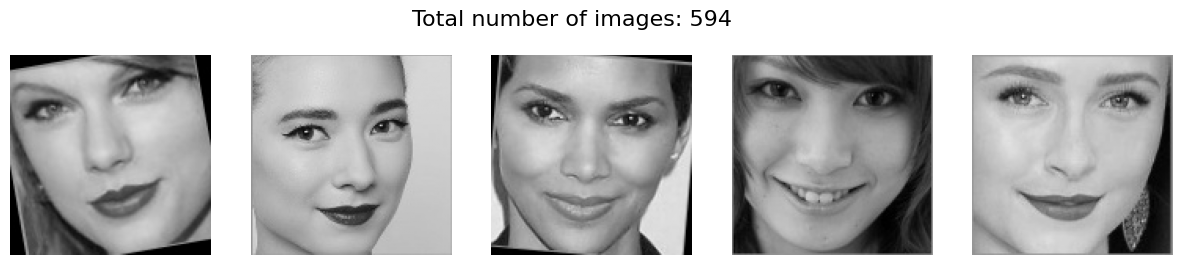

Total number of images in ./Augmentation/oblong/: 600


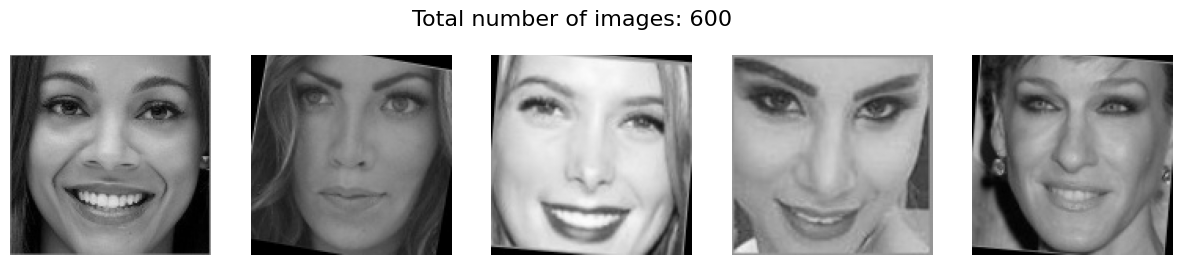

Total number of images in ./Augmentation/square/: 600


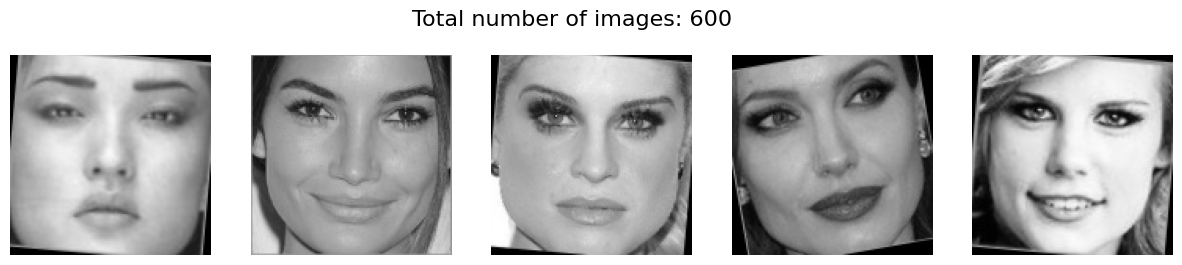

Total number of images in ./Augmentation/round/: 558


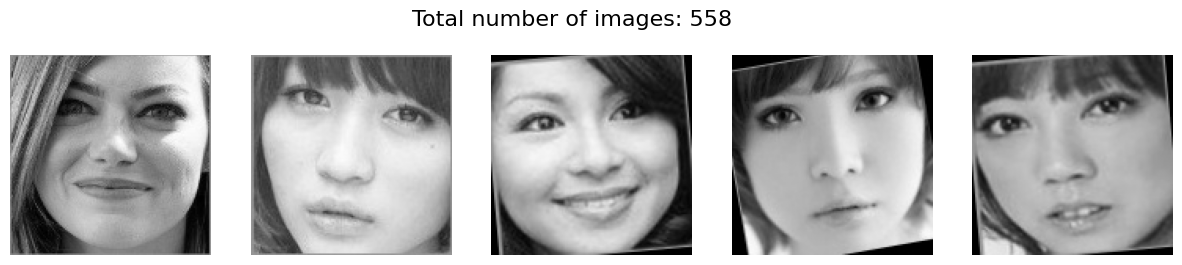

Total number of images in ./Augmentation/oval/: 570


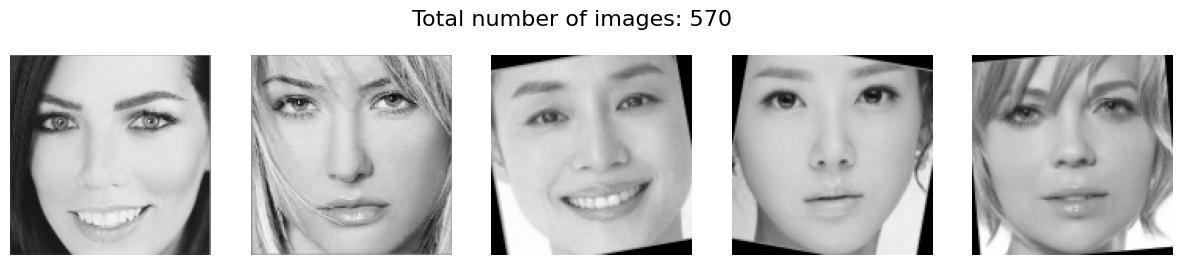

In [20]:
random_samples = 5 

heart = "./Augmentation/heart/"
oblong = "./Augmentation/oblong/"  
square = "./Augmentation/square/"  
round = "./Augmentation/round/"  
oval = "./Augmentation/oval/"   

plot_random_images(heart , random_samples)
plot_random_images(oblong , random_samples)
plot_random_images(square , random_samples)
plot_random_images(round , random_samples)
plot_random_images(oval , random_samples)